In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestCentroid
from credit_card_segmentation.data.custom import evaluate_clustering_models, scatter_plot   
from credit_card_segmentation.config.config import (
    MODEL_TRAINING_DATA,
    EVALUATION_TEST_DATA,
    TRAINED_KMEANS_CLUSTERER,
    TRAINED_DBSCAN_CLUSTERER,
    TRAINED_HIERARCHICAL_CLUSTERER,
    TRAINED_KMEANS_FEATURES,
    TRAINED_DBSCAN_FEATURES,
    TRAINED_HIERARCHICAL_FEATURES,
)

In [2]:
def load_training_objects():
    kmeans_model = joblib.load(TRAINED_KMEANS_CLUSTERER)
    dbscan_model = joblib.load(TRAINED_DBSCAN_CLUSTERER)
    hierarchical_model = joblib.load(TRAINED_HIERARCHICAL_CLUSTERER)
    kmeans_model_features = joblib.load(TRAINED_KMEANS_FEATURES)
    dbscan_model_features = joblib.load(TRAINED_DBSCAN_FEATURES)
    hierarchical_model_features = joblib.load(TRAINED_HIERARCHICAL_FEATURES)
    X_train = joblib.load(MODEL_TRAINING_DATA)
    X_test = joblib.load(EVALUATION_TEST_DATA)

    return (
        kmeans_model,
        dbscan_model,
        hierarchical_model,
        kmeans_model_features,
        dbscan_model_features,
        hierarchical_model_features,
        X_train,
        X_test
    )

In [3]:
(
    kmeans_model,
    dbscan_model,
    hierarchical_model,
    kmeans_model_features,
    dbscan_model_features,
    hierarchical_model_features,
    X_train,
    X_test
) = load_training_objects()

In [31]:
print(kmeans_model_features)
print(dbscan_model_features)
print(hierarchical_model_features)

['ONEOFF_PURCHASES_FREQUENCY_stabilized_weighted']
['PURCHASES_stabilized_weighted', 'INSTALLMENTS_PURCHASES_stabilized_weighted', 'ONEOFF_PURCHASES_stabilized_weighted', 'ONEOFF_PURCHASES_FREQUENCY_stabilized_weighted']
['CASH_ADVANCE_stabilized_weighted']


In [4]:
X_train_kmeans_optimal = X_train[kmeans_model_features]
X_train_dbscan_optimal = X_train[dbscan_model_features]
X_train_hierarchical_optimal = X_train[hierarchical_model_features]

X_test_kmeans_optimal = X_test[kmeans_model_features]
X_test_dbscan_optimal = X_test[dbscan_model_features]
X_test_hierarchical_optimal = X_test[hierarchical_model_features]

Extracting the defined clusters from the trained model on the training set

In [5]:
kmeans_train_clusters = kmeans_model.labels_
dbscan_train_clusters = dbscan_model.labels_
hierarchical_train_clusters = hierarchical_model.labels_

Assigning test points based on their proximity to nearest clustered points by DBSCAN clusterer

In [6]:
centroid_model_dbscan = NearestCentroid()
centroid_model_dbscan.fit(X_train_dbscan_optimal, dbscan_train_clusters)

NearestCentroid()

Assigning test points based on their proximity to nearest clustered points by Hierarchical clusterer

In [7]:
centroid_model_hierarchical = NearestCentroid()
centroid_model_hierarchical.fit(X_train_hierarchical_optimal, hierarchical_train_clusters)

NearestCentroid()

In [8]:
kmeans_test_clusters = kmeans_model.predict(X_test_kmeans_optimal)
dbscan_test_clusters = centroid_model_dbscan.predict(X_test_dbscan_optimal)
hierarchical_test_clusters = centroid_model_hierarchical.predict(X_test_hierarchical_optimal)

#### Visualization with PCA

Training Set Visualization (PCA)

In [9]:
def apply_pca(X_optimal):
    if X_optimal.shape[1] > 2:
        pca = PCA(n_components=2)
        return pca.fit_transform(X_optimal)
    else:
        return X_optimal

In [10]:
X_train_kmeans_pca = apply_pca(X_train_kmeans_optimal)
X_train_dbscan_pca = apply_pca(X_train_dbscan_optimal)
X_train_hierarchical_pca = apply_pca(X_train_hierarchical_optimal)

KMeans Clustering with PCA (Training Set)

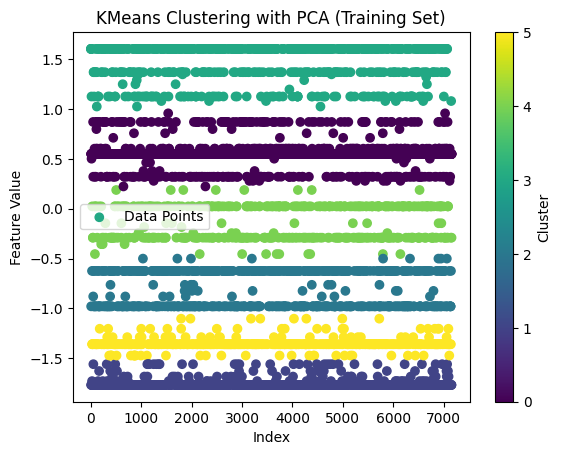

In [11]:
scatter_plot(X_train_kmeans_pca, kmeans_train_clusters, title="KMeans Clustering with PCA (Training Set)")

DBSCAN Clustering with PCA (Training Set)

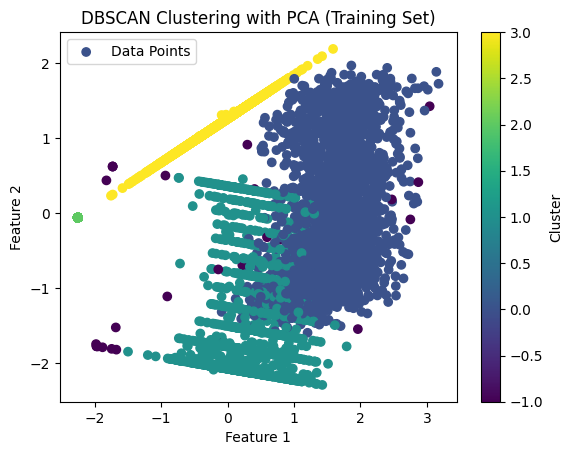

In [12]:
scatter_plot(X_train_dbscan_pca, dbscan_train_clusters, title="DBSCAN Clustering with PCA (Training Set)")

Hierarchical Clustering with PCA (Training Set)

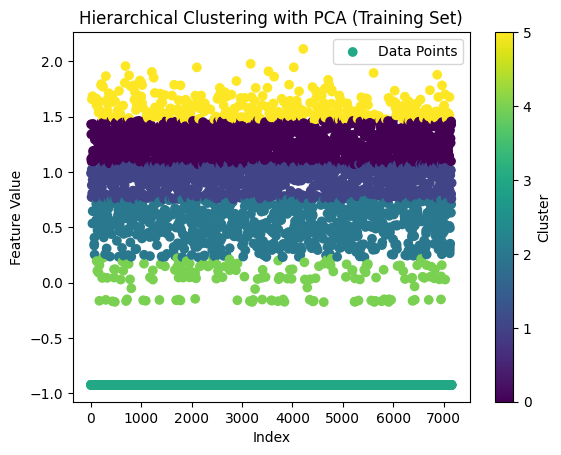

In [13]:
scatter_plot(X_train_hierarchical_pca, hierarchical_train_clusters, title="Hierarchical Clustering with PCA (Training Set)")

Test Set Visualization (PCA)

In [14]:
X_test_kmeans_pca = apply_pca(X_test_kmeans_optimal)
X_test_dbscan_pca = apply_pca(X_test_dbscan_optimal)
X_test_hierarchical_pca = apply_pca(X_test_hierarchical_optimal)

KMeans Clustering with PCA (Test Set)

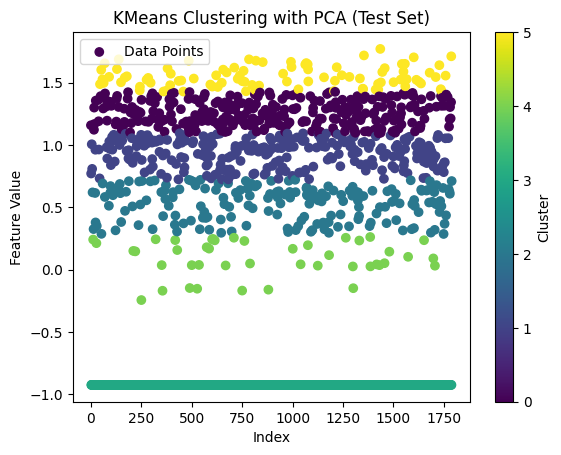

In [15]:
scatter_plot(X_test_hierarchical_pca, hierarchical_test_clusters, title="KMeans Clustering with PCA (Test Set)")

In [16]:
print(X_test_dbscan_pca.shape)
print(X_test_hierarchical_pca.shape)

(1790, 2)
(1790, 1)


DBSCAN Clustering with PCA (Test Set)

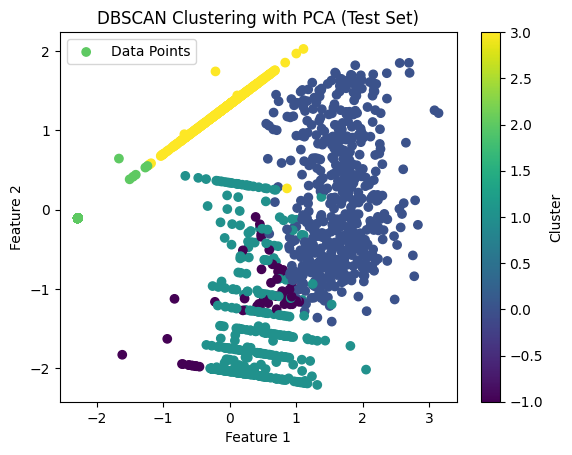

In [17]:
scatter_plot(X_test_dbscan_pca, dbscan_test_clusters, title="DBSCAN Clustering with PCA (Test Set)")

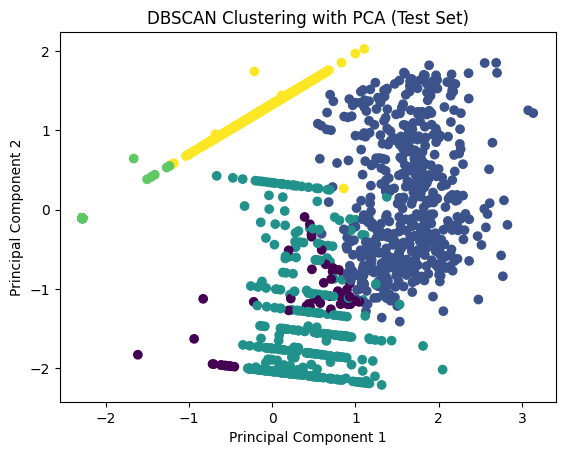

In [18]:
plt.scatter(X_test_dbscan_pca[:, 0], X_test_dbscan_pca[:, 1], c=dbscan_test_clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering with PCA (Test Set)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Hierarchical Clustering with PCA (Test Set)

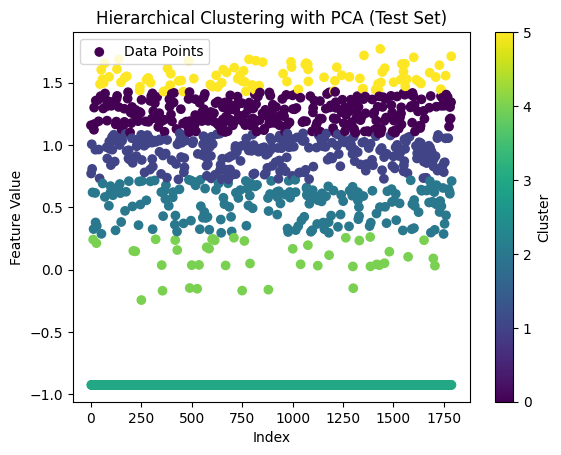

In [19]:
scatter_plot(X_test_hierarchical_pca, hierarchical_test_clusters, title="Hierarchical Clustering with PCA (Test Set)")

#### Visualization with t-SNE

Training Set Visualization (t-SNE)

In [20]:
def apply_tsne(X_optimal):
    if X_optimal.shape[1] > 2:
        tsne = TSNE(n_components=2, random_state=42)
        return tsne.fit_transform(X_optimal)
    else:
        return X_optimal

In [21]:
X_train_kmeans_tsne = apply_tsne(X_train_kmeans_optimal)
X_train_dbscan_tsne = apply_tsne(X_train_dbscan_optimal)
X_train_hierarchical_tsne = apply_tsne(X_train_hierarchical_optimal)

KMeans Clustering with t-SNE (Training Set)

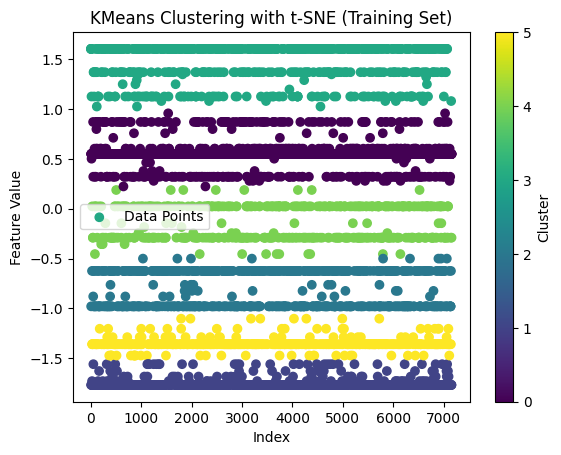

In [22]:
scatter_plot(X_train_kmeans_tsne, kmeans_train_clusters, title="KMeans Clustering with t-SNE (Training Set)")

DBSCAN Clustering with t-SNE (Training Set)

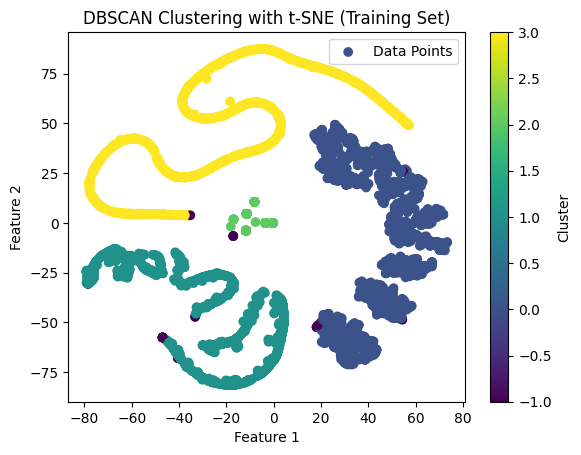

In [23]:
scatter_plot(X_train_dbscan_tsne, dbscan_train_clusters, title="DBSCAN Clustering with t-SNE (Training Set)")

Hierarchical Clustering with t-SNE (Training Set)

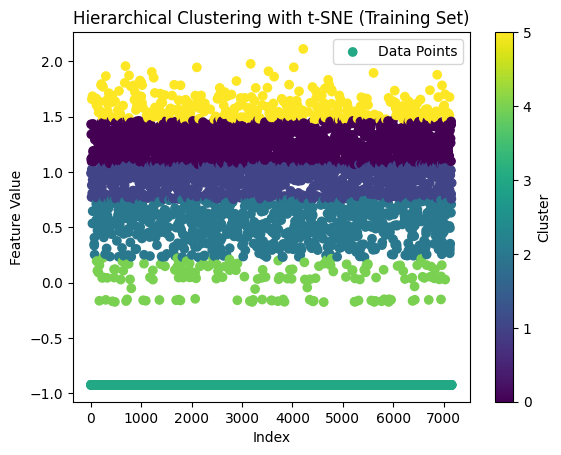

In [24]:
scatter_plot(X_train_hierarchical_tsne, hierarchical_train_clusters, title="Hierarchical Clustering with t-SNE (Training Set)")

Test Set Visualization (t-SNE)

In [25]:
X_test_kmeans_tsne = apply_tsne(X_test_kmeans_optimal)
X_test_dbscan_tsne = apply_tsne(X_test_dbscan_optimal)
X_test_hierarchical_tsne = apply_tsne(X_test_hierarchical_optimal)

KMeans Clustering with t-SNE (Test Set)

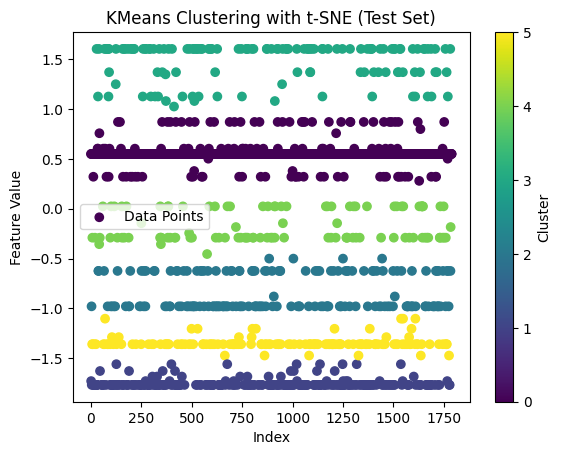

In [26]:
scatter_plot(X_test_kmeans_tsne, kmeans_test_clusters, title="KMeans Clustering with t-SNE (Test Set)")

DBSCAN Clustering with t-SNE (Test Set)

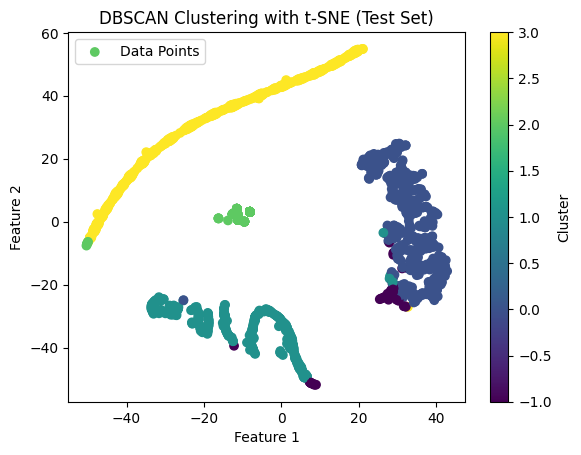

In [27]:
scatter_plot(X_test_dbscan_tsne, dbscan_test_clusters, title="DBSCAN Clustering with t-SNE (Test Set)")

Hierarchical Clustering with t-SNE (Test Set)

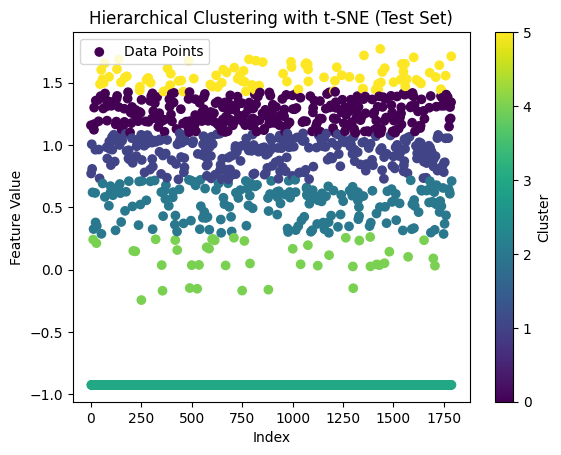

In [28]:
scatter_plot(X_test_hierarchical_tsne, hierarchical_test_clusters, title="Hierarchical Clustering with t-SNE (Test Set)")

Evaluation Report for the Clustering Models

In [29]:
training_clustering = {
    "KMeans Clusterer": kmeans_train_clusters,
    "DBSCAN Clusterer": dbscan_train_clusters,
    "Hierarchical Clusterer": hierarchical_train_clusters
}

test_clustering = {
    "KMeans Clusterer": kmeans_test_clusters,
    "DBSCAN Clusterer": dbscan_test_clusters,
    "Hierarchical Clusterer": hierarchical_test_clusters
}

X_train_dict = {
    "KMeans Clusterer": X_train_kmeans_optimal,
    "DBSCAN Clusterer": X_train_dbscan_optimal,
    "Hierarchical Clusterer": X_train_hierarchical_optimal
}

X_test_dict = {
    "KMeans Clusterer": X_test_kmeans_optimal,
    "DBSCAN Clusterer": X_test_dbscan_optimal,
    "Hierarchical Clusterer": X_test_hierarchical_optimal
}

In [30]:
evaluation_report = evaluate_clustering_models(
    training_clustering=training_clustering,
    test_clustering=test_clustering,
    X_train_dict=X_train_dict,
    X_test_dict=X_test_dict
)
evaluation_report

,Model,Silhouette Score (Train),Silhouette Score (Test),Davies-Bouldin Score (Train),Davies-Bouldin Score (Test),Calinski-Harabasz Score (Train),Calinski-Harabasz Score (Test)
0,KMeans Clusterer,0.862371,0.861755,0.339443,0.333805,128154.281391,32734.484636
1,DBSCAN Clusterer,0.592843,0.526344,1.793548,0.902245,5250.178807,1513.348757
2,Hierarchical Clusterer,0.751923,0.759734,0.453662,0.457567,215300.853297,62264.226405
